In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib

In [7]:
data_dir_train = pathlib.Path("dataset/train") # путь к изобраениям для тренировки
data_dir_test = pathlib.Path("dataset/test") # путь к изобраениям для теста
dir_path = os.getcwd() # корневой путь

In [8]:
files_train_nv = next(os.walk(os.path.join(dir_path, data_dir_train, 'nevus')), (None, None, []))[2]
files_train_mel = next(os.walk(os.path.join(dir_path, data_dir_train, 'melanoma')), (None, None, []))[2]
files_test_nv = next(os.walk(os.path.join(dir_path, data_dir_test, 'nevus')), (None, None, []))[2]
files_test_mel = next(os.walk(os.path.join(dir_path, data_dir_test, 'melanoma')), (None, None, []))[2]

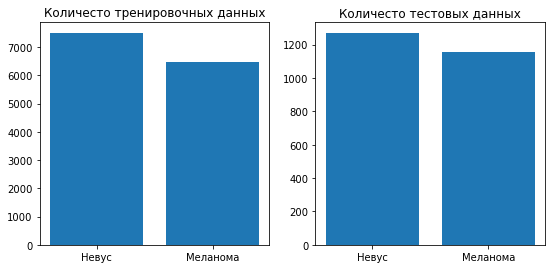

In [9]:
plt.figure(figsize=(14, 9))

ax = plt.subplot(2, 3, 1)
ax.bar(['Невус', 'Меланома'], [len(files_train_nv), len(files_train_mel)])
plt.title("Количесто тренировочных данных")

ax = plt.subplot(2, 3, 2)
ax.bar(['Невус', 'Меланома'], [len(files_test_nv), len(files_test_mel)])
plt.title("Количесто тестовых данных")

plt.show()

In [10]:
df = pd.read_csv('/home/hedg/Documents/lida/projects/MelNevClassification/dataset/merged.csv')
df.head()

,image_id,dx,age,sex,localization,has_hair
0,ISIC_0024698,nv,70.0,male,face,0
1,ISIC_0024693,nv,45.0,female,upper extremity,0
2,ISIC_0025964,mel,40.0,female,chest,0
3,ISIC_0030623,mel,40.0,female,chest,0
4,ISIC_0027190,mel,80.0,male,upper extremity,0


In [11]:
train_df = pd.DataFrame(columns=df.columns)
for i in files_train_nv:
    name = i[:i.find('.jpg')]
    train_df = pd.concat([train_df, df[df.image_id == name]])

/tmp/ipykernel_7393/3755441737.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_df = pd.concat([train_df, df[df.image_id == name]])


In [14]:
for i in files_train_mel:
    name = i[:i.find('.jpg')]
    train_df = pd.concat([train_df, df[df.image_id == name]])

In [15]:
train_df

,image_id,dx,age,sex,localization,has_hair
1362,ISIC_0026098,nv,55.0,male,abdomen,0
11716,ISIC_0026098,nv,55.0,male,anterior torso,0
9027,ISIC_0011357,nv,40.0,male,upper extremity,0
5299,ISIC_0029953,nv,10.0,male,genital,0
14684,ISIC_0029953,nv,10.0,male,NaN,0
...,...,...,...,...,...,...
21440,ISIC_0062674,mel,55.0,male,anterior torso,0
22531,ISIC_0065644,mel,80.0,male,palms/soles,0
19458,ISIC_0057061,mel,75.0,male,head/neck,1
214,ISIC_0029513,mel,70.0,male,trunk,0


In [16]:
train_df.to_csv('dataset/train.csv',index=False)

In [17]:
test_df = pd.DataFrame(columns=df.columns)
for i in files_test_nv:
    name = i[:i.find('.jpg')]
    test_df = pd.concat([test_df, df[df.image_id == name]])
for i in files_test_mel:
    name = i[:i.find('.jpg')]
    test_df = pd.concat([test_df, df[df.image_id == name]])

/tmp/ipykernel_7393/2089192568.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_df = pd.concat([test_df, df[df.image_id == name]])


In [18]:
test_df

,image_id,dx,age,sex,localization,has_hair
7022,ISIC_0025640,nv,40.0,male,abdomen,0
11364,ISIC_0025640,nv,40.0,male,anterior torso,0
3754,ISIC_0030098,nv,40.0,female,lower extremity,0
14807,ISIC_0030098,nv,40.0,female,lower extremity,0
27683,ISIC_0063000,nv,70.0,male,anterior torso,0
...,...,...,...,...,...,...
22152,ISIC_0064632,mel,40.0,male,anterior torso,0
8924,ISIC_0011126,mel,45.0,male,upper extremity,1
9646,ISIC_0013969_downsampled,mel,80.0,female,anterior torso,0
26580,ISIC_0054412,mel,70.0,female,anterior torso,0


In [19]:
test_df.to_csv('dataset/test.csv',index=False)